<a href="https://colab.research.google.com/github/yanliu1111/DGT170_AI_Essentials_course_resources/blob/main/Genimi_data_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
1. Load and preview the attached dataset (Book0322.csv), check for missing values, and summarize categorical columns such as Session, Gender, Programmer status, and Experience with AI to understand the overall data distribution.

 2. Analyze the relationship between Experience with AI and Session to identify any patterns in AI experience across different sessions, avoiding the use of heatmaps and instead using grouped summaries or suitable visualizations.

 3. Create a bar chart to show the number of participants in each session, and use either a grouped or stacked bar chart to compare the count of participants with and without AI experience within each session.

4. Explore the relationship between Gender, Programmer status, and Experience with AI, and use a grouped bar chart or count plot to show how AI experience varies across different gender and programmer combinations.

 5. Replace Gender with Programmer status and analyze its relationship with Experience with AI, including a bar chart that illustrates how AI experience is distributed among different groups based on programming background.

 6. Perform a word frequency analysis on the Goals column for each session by cleaning and processing the text, extracting the top 10 most frequent words per session, and visualizing the results with a word cloud for each session.

Here is all the data you need:
"Book0322.csv"

## Data loading

### Subtask:
Load the dataset and preview its structure.


**Reasoning**:
Load the dataset and preview its structure by displaying the first 10 rows and printing the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Book0322.csv', encoding='latin-1')
    display(df.head(10))
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Book0322.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,ï»¿Start time,city,Session,Enter your age,Gender,Are you currently affiliated with the University of Calgary?,How would you rate your experience with Artificial Intelligence (AI),Do you have any experience with programming languages or tools used in AI?,What are your goals for completing this course?
0,1/31/2025 12:52,Carstairs,1,42,Female,Staff,Beginner,No,Interest in AI and technology;Career advancement;
1,1/31/2025 13:08,Calgary,1,53,Female,Alumni,Beginner,No,Career advancement;Personal growth and learnin...
2,1/31/2025 13:11,Barrie Ontario,1,43,Male,Continuing Education student,Intermediate,Yes,Interest in AI and technology;Free course avai...
3,1/31/2025 13:11,Calgary,1,36,Male,Alumni,Beginner,Yes,Career advancement;Personal growth and learnin...
4,1/31/2025 13:11,Calgary,1,29,Female,Alumni,Beginner,No,Free course availability;Interest in AI and te...
5,1/31/2025 13:11,Calgary,1,33,Female,Staff,No Experience,No,Interest in AI and technology;Personal growth ...
6,1/31/2025 13:11,Tor,1,30,Male,Researcher,Intermediate,Yes,Career advancement;
7,1/31/2025 13:11,Calgary,1,38,Female,"No, I am not affiliated with the University of...",Beginner,No,Interest in AI and technology;Personal growth ...
8,1/31/2025 13:11,Edmonton,1,35,Female,"No, I am not affiliated with the University of...",Beginner,No,Interest in AI and technology;Career advanceme...
9,1/31/2025 13:11,Toronto,1,36,Male,"No, I am not affiliated with the University of...",Beginner,No,Free course availability;Career advancement;In...


(1775, 9)


## Data exploration

### Subtask:
Explore the dataset for missing values and summarize categorical columns.


**Reasoning**:
I need to check for missing values and summarize categorical columns as requested in the subtask.



In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Summarize categorical columns
categorical_cols = ['Session', 'Gender', 'Do you have any experience with programming languages or tools used in AI?', 'How would you rate your experience with Artificial Intelligence (AI)']
for col in categorical_cols:
    print(f"\nSummary for column: {col}")
    print("Number of unique values:", df[col].nunique())
    print("Value counts:\n", df[col].value_counts())
    print("Unique values:", df[col].unique())

# Summarize numerical columns
numerical_cols = ['Enter your age']
print("\nSummary statistics for numerical columns:")
display(df[numerical_cols].describe())

Missing Values:
 ï»¿Start time                                                                 0
city                                                                          0
Session                                                                       0
Enter your age                                                                0
Gender                                                                        0
Are you currently affiliated with the University of Calgary?                  0
How would you rate your experience with Artificial Intelligence (AI)          0
Do you have any experience with programming languages or tools used in AI?    0
What are your goals for completing this course?                               0
dtype: int64

Missing Value Percentage:
 ï»¿Start time                                                                 0.0
city                                                                          0.0
Session                                                   

,Enter your age
count,1775.000000
mean,44.005070
std,11.213289
min,13.000000
25%,36.000000
50%,43.000000
75%,51.000000
max,100.000000


## Data analysis

### Subtask:
Analyze the relationship between 'Experience with AI' and 'Session'.


**Reasoning**:
Group the data by 'Session' and 'How would you rate your experience with Artificial Intelligence (AI)' to analyze the relationship between them. Calculate the total participants in each session and the percentage of participants with each AI experience level within each session.



In [3]:
import pandas as pd

# Group data by 'Session' and 'AI Experience'
experience_by_session = df.groupby(['Session', 'How would you rate your experience with Artificial Intelligence (AI)']).size().unstack(fill_value=0)

# Calculate total participants per session
experience_by_session['Total'] = experience_by_session.sum(axis=1)

# Calculate percentage for each experience level within each session
for col in experience_by_session.columns[:-1]:  # Exclude the 'Total' column
    experience_by_session[col + ' (%)'] = (experience_by_session[col] / experience_by_session['Total']) * 100

display(experience_by_session)

How would you rate your experience with Artificial Intelligence (AI),Advanced,Beginner,Intermediate,No Experience,Total,Advanced (%),Beginner (%),Intermediate (%),No Experience (%)
Session,,,,,,,,,
1,1,124,32,28,185,0.540541,67.027027,17.297297,15.135135
2,2,81,29,25,137,1.459854,59.124088,21.167883,18.248175
3,1,101,30,23,155,0.645161,65.161290,19.354839,14.838710
4,2,50,15,13,80,2.500000,62.500000,18.750000,16.250000
5,2,50,12,4,68,2.941176,73.529412,17.647059,5.882353
6,2,92,36,15,145,1.379310,63.448276,24.827586,10.344828
7,2,124,51,31,208,0.961538,59.615385,24.519231,14.903846
8,4,125,37,25,191,2.094241,65.445026,19.371728,13.089005
9,4,93,32,16,145,2.758621,64.137931,22.068966,11.034483


## Data visualization

### Subtask:
Visualize the distribution of participants across sessions and their AI experience levels.


**Reasoning**:
Generate the code to create the bar chart visualizations as per the instructions.



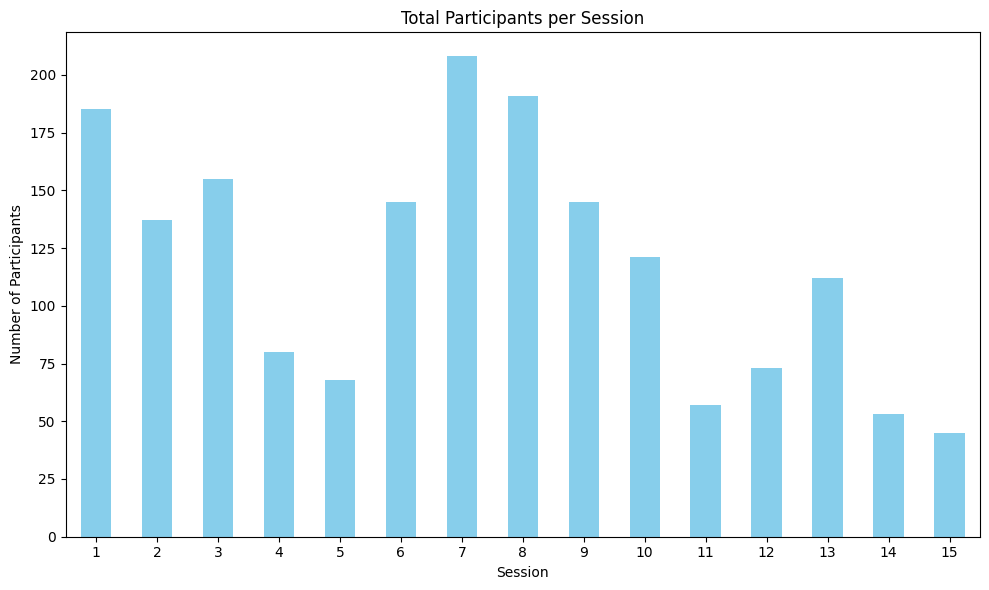

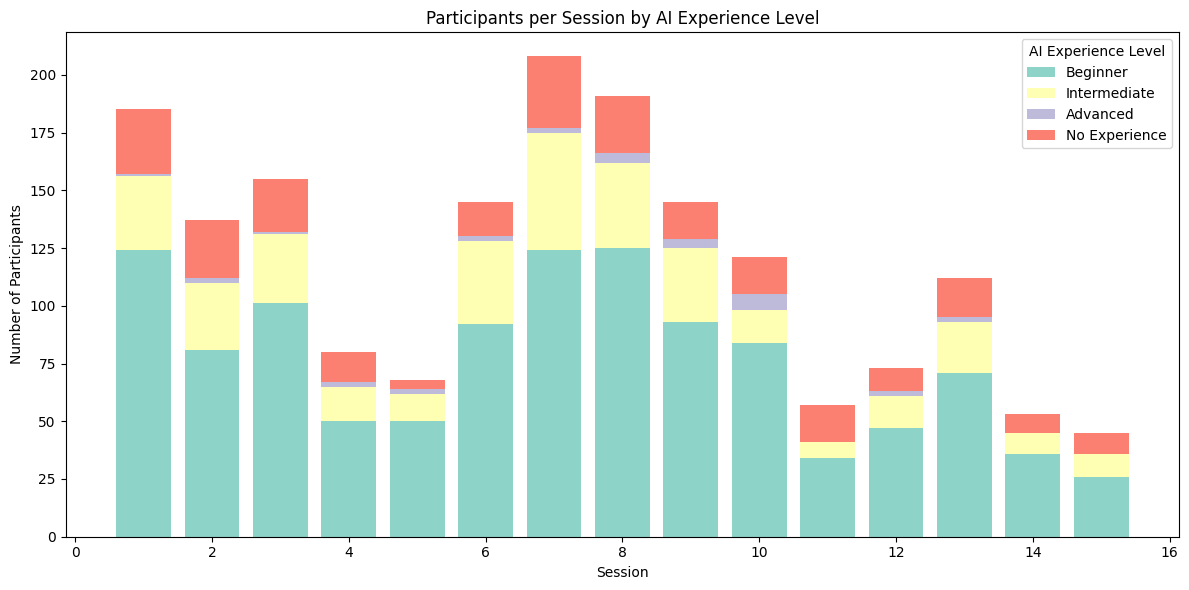

In [5]:
import matplotlib.pyplot as plt

# 1. Bar chart of total participants per session
plt.figure(figsize=(10, 6))
experience_by_session['Total'].plot(kind='bar', color='skyblue')
plt.title('Total Participants per Session')
plt.xlabel('Session')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Grouped bar chart of participants with/without AI experience
experience_levels = ['Beginner', 'Intermediate', 'Advanced', 'No Experience']
plt.figure(figsize=(12, 6))
for i, level in enumerate(experience_levels):
    bottom = experience_by_session.loc[:, experience_levels[:i]].sum(axis=1) if i > 0 else 0
    plt.bar(experience_by_session.index, experience_by_session[level], bottom=bottom, label=level, color=plt.cm.Set3(i))

plt.title('Participants per Session by AI Experience Level')
plt.xlabel('Session')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(title='AI Experience Level')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the relationship between 'Gender', 'Programmer status', and 'Experience with AI'.


**Reasoning**:
Group the data by 'Gender', 'Programmer status', and 'Experience with AI', then create a new DataFrame, unstack the 'Experience with AI' level, and fill missing values with 0.



In [6]:
# Group the data and create a new DataFrame
grouped_data = df.groupby(['Gender', 'Do you have any experience with programming languages or tools used in AI?', 'How would you rate your experience with Artificial Intelligence (AI)']).size().reset_index(name='Count')
display(grouped_data)

# Create a pivot table for easier analysis
pivot_table = grouped_data.pivot_table(index=['Gender', 'Do you have any experience with programming languages or tools used in AI?'], columns='How would you rate your experience with Artificial Intelligence (AI)', values='Count', fill_value=0)
display(pivot_table)

# Calculate the total count for each gender-programmer combination
pivot_table['Total'] = pivot_table.sum(axis=1)
display(pivot_table)

,Gender,Do you have any experience with programming languages or tools used in AI?,How would you rate your experience with Artificial Intelligence (AI),Count
0,Female,No,Advanced,1
1,Female,No,Beginner,382
2,Female,No,Intermediate,72
3,Female,No,No Experience,101
4,Female,Yes,Advanced,3
5,Female,Yes,Beginner,88
6,Female,Yes,Intermediate,39
7,Female,Yes,No Experience,9
8,Male,No,Advanced,1
9,Male,No,Beginner,417


How would you rate your experience with Artificial Intelligence (AI)  Advanced  \
Gender            Do you have any experience with programming lan...             
Female            No                                                       1.0   
                  Yes                                                      3.0   
Male              No                                                       1.0   
                  Yes                                                     26.0   
Non-binary        No                                                       0.0   
                  Yes                                                      0.0   
Others            No                                                       0.0   
Prefer not to say No                                                       0.0   
                  Yes                                                      0.0   

How would you rate your experience with Artificial Intelligence (AI)  Beginner  \
Gender            Do you have any experience with programming lan...             
Female            No                                                     382.0   
                  Yes                                                     88.0   
Male              No                                                     417.0   
                  Yes                                                    235.0   
Non-binary        No                                                       2.0   
                  Yes                                                      1.0   
Others            No                                                       1.0   
Prefer not to say No                                                      10.0   
                  Yes                                                      2.0   

How would you rate your experience with Artificial Intelligence (AI)  Intermediate  \
Gender            Do you have any experience with programming lan...                 
Female            No                                                          72.0   
                  Yes                                                         39.0   
Male              No                                                          83.0   
                  Yes                                                        149.0   
Non-binary        No                                                           2.0   
                  Yes                                                          2.0   
Others            No                                                           0.0   
Prefer not to say No                                                           1.0   
                  Yes                                                          2.0   

How would you rate your experience with Artificial Intelligence (AI)  No Experience  
Gender            Do you have any experience with programming lan...                 
Female            No                                                          101.0  
                  Yes                                                           9.0  
Male              No                                                          114.0  
                  Yes                                                          26.0  
Non-binary        No                                                            1.0  
                  Yes                                                           0.0  
Others            No                                                            1.0  
Prefer not to say No                                                            4.0  
                  Yes                                                           0.0

How would you rate your experience with Artificial Intelligence (AI)  Advanced  \
Gender            Do you have any experience with programming lan...             
Female            No                                                       1.0   
                  Yes                                                      3.0   
Male              No                                                       1.0   
                  Yes                                                     26.0   
Non-binary        No                                                       0.0   
                  Yes                                                      0.0   
Others            No                                                       0.0   
Prefer not to say No                                                       0.0   
                  Yes                                                      0.0   

How would you rate your experience with Artificial Intelligence (AI)  Beginner  \
Gender            Do you have any experience with programming lan...             
Female            No                                                     382.0   
                  Yes                                                     88.0   
Male              No                                                     417.0   
                  Yes                                                    235.0   
Non-binary        No                                                       2.0   
                  Yes                                                      1.0   
Others            No                                                       1.0   
Prefer not to say No                                                      10.0   
                  Yes                                                      2.0   

How would you rate your experience with Artificial Intelligence (AI)  Intermediate  \
Gender            Do you have any experience with programming lan...                 
Female            No                                                          72.0   
                  Yes                                                         39.0   
Male              No                                                          83.0   
                  Yes                                                        149.0   
Non-binary        No                                                           2.0   
                  Yes                                                          2.0   
Others            No                                                           0.0   
Prefer not to say No                                                           1.0   
                  Yes                                                          2.0   

How would you rate your experience with Artificial Intelligence (AI)  No Experience  \
Gender            Do you have any experience with programming lan...                  
Female            No                                                          101.0   
                  Yes                                                           9.0   
Male              No                                                          114.0   
                  Yes                                                          26.0   
Non-binary        No                                                            1.0   
                  Yes                                                           0.0   
Others            No                                                            1.0   
Prefer not to say No                                                            4.0   
                  Yes                                                           0.0   

How would you rate your experience with Artificial Intelligence (AI)  Total  
Gender            Do you have any experience with programming lan...         
Female            No                                                  556.0  
                  Yes                                  

## Data visualization

### Subtask:
Visualize the relationship between Gender, Programmer Status, and Experience with AI using a grouped bar chart.


**Reasoning**:
Generate the grouped bar chart based on the pivot table.



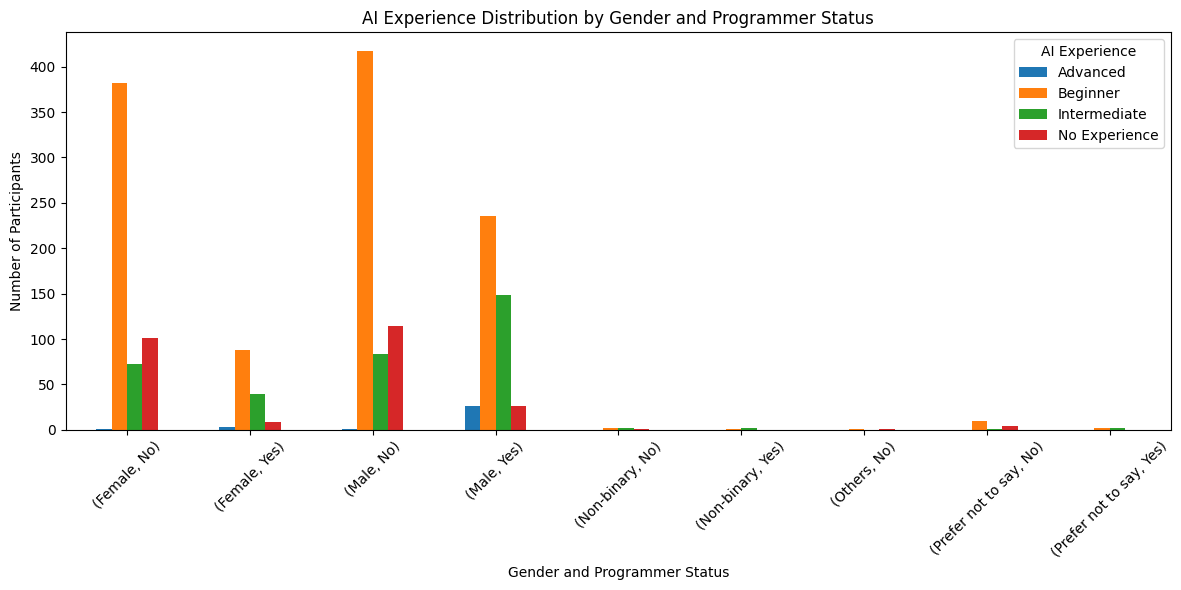

In [7]:
import matplotlib.pyplot as plt

# Assuming 'pivot_table' is already created from the previous step
pivot_table_for_plot = pivot_table.drop(columns=['Total'])

# Create the grouped bar chart
ax = pivot_table_for_plot.plot(kind='bar', figsize=(12, 6), rot=45)

# Customize the chart
plt.title('AI Experience Distribution by Gender and Programmer Status')
plt.xlabel('Gender and Programmer Status')
plt.ylabel('Number of Participants')
plt.legend(title='AI Experience')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the relationship between 'Programmer status' and 'Experience with AI'.


**Reasoning**:
Group the data by 'Programmer status' and 'Experience with AI', aggregate the counts, calculate totals and percentages, and store the results in the `programmer_ai_experience` DataFrame.



In [8]:
# Group data by 'Programmer status' and 'AI Experience'
programmer_ai_experience = df.groupby(['Do you have any experience with programming languages or tools used in AI?', 'How would you rate your experience with Artificial Intelligence (AI)']).size().unstack(fill_value=0)

# Calculate total participants for each programmer status
programmer_ai_experience['Total'] = programmer_ai_experience.sum(axis=1)

# Calculate percentage for each AI experience level within each programmer status
for col in programmer_ai_experience.columns[:-1]:
    programmer_ai_experience[col + ' (%)'] = (programmer_ai_experience[col] / programmer_ai_experience['Total']) * 100

display(programmer_ai_experience)

How would you rate your experience with Artificial Intelligence (AI),Advanced,Beginner,Intermediate,No Experience,Total,Advanced (%),Beginner (%),Intermediate (%),No Experience (%)
Do you have any experience with programming languages or tools used in AI?,,,,,,,,,
No,2,812,158,221,1193,0.167645,68.063705,13.243923,18.524728
Yes,29,326,192,35,582,4.982818,56.013746,32.989691,6.013746


## Data visualization

### Subtask:
Visualize the distribution of AI experience levels across different programmer status groups.


**Reasoning**:
Create a grouped bar chart to visualize the distribution of AI experience levels across different programmer status groups using the 'programmer_ai_experience' DataFrame.



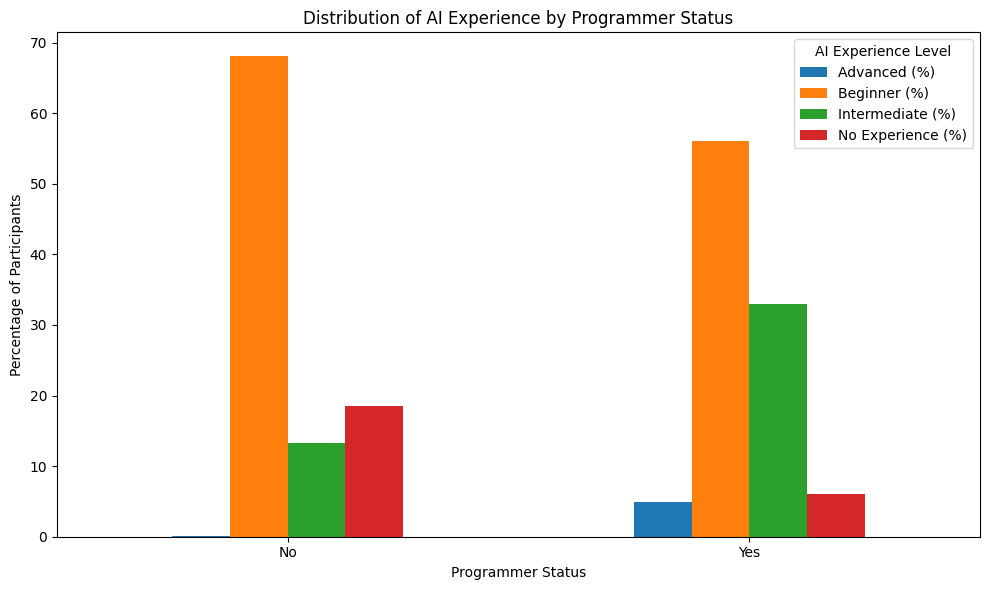

In [9]:
import matplotlib.pyplot as plt

# Create the grouped bar chart
programmer_ai_experience_percentage = programmer_ai_experience[['Advanced (%)', 'Beginner (%)', 'Intermediate (%)', 'No Experience (%)']]
ax = programmer_ai_experience_percentage.plot(kind='bar', figsize=(10, 6))

# Customize the chart
plt.title('Distribution of AI Experience by Programmer Status')
plt.xlabel('Programmer Status')
plt.ylabel('Percentage of Participants')
plt.xticks(rotation=0)
plt.legend(title='AI Experience Level')
plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Clean and preprocess the 'Goals' column in the DataFrame.


**Reasoning**:
Clean and preprocess the 'Goals' column as per the instructions, converting text to lowercase, removing punctuation and extra whitespace, and optionally performing stemming or lemmatization.



In [10]:
import re
import pandas as pd

# Convert text to lowercase
df['What are your goals for completing this course?'] = df['What are your goals for completing this course?'].str.lower()

# Remove punctuation
df['What are your goals for completing this course?'] = df['What are your goals for completing this course?'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remove extra whitespace
df['What are your goals for completing this course?'] = df['What are your goals for completing this course?'].str.strip()

# Optionally perform stemming or lemming (commented out for now, can be uncomment and configured as needed)
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# df['Goals'] = df['Goals'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

display(df.head())

,ï»¿Start time,city,Session,Enter your age,Gender,Are you currently affiliated with the University of Calgary?,How would you rate your experience with Artificial Intelligence (AI),Do you have any experience with programming languages or tools used in AI?,What are your goals for completing this course?
0,1/31/2025 12:52,Carstairs,1,42,Female,Staff,Beginner,No,interest in ai and technologycareer advancement
1,1/31/2025 13:08,Calgary,1,53,Female,Alumni,Beginner,No,career advancementpersonal growth and learning...
2,1/31/2025 13:11,Barrie Ontario,1,43,Male,Continuing Education student,Intermediate,Yes,interest in ai and technologyfree course avail...
3,1/31/2025 13:11,Calgary,1,36,Male,Alumni,Beginner,Yes,career advancementpersonal growth and learning...
4,1/31/2025 13:11,Calgary,1,29,Female,Alumni,Beginner,No,free course availabilityinterest in ai and tec...


## Data analysis

### Subtask:
Perform word frequency analysis on the preprocessed 'Goals' column for each session.


**Reasoning**:
Group the dataframe by session, then process the 'Goals' column for each session to find the top 10 most frequent words, excluding stop words.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


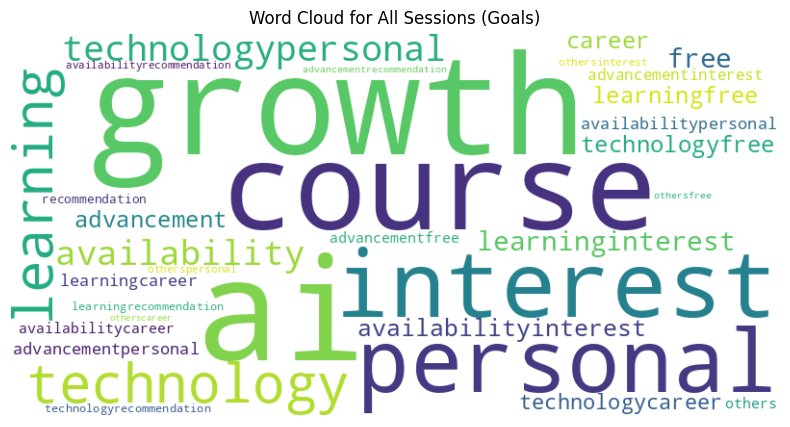

In [17]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re


!pip install wordcloud

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Combine all goals from all sessions
all_goals = ';'.join(df['What are your goals for completing this course?'].astype(str).tolist())

# Split the combined goals string into individual goals using ';' as the delimiter
individual_goals = all_goals.split(';')

# Remove punctuation and extra whitespace, and convert to lowercase
individual_goals = [goal.strip().lower().replace(r'[^\w\s]', '') for goal in individual_goals if goal.strip()]

# Remove stop words
stop_words = set(stopwords.words('english'))
# The issue was this line:
# filtered_goals = [goal for goal in individual_goals if goal not in stop_words and goal.isalnum()]
# It was removing all the words because most if not all goals contained some non-alphanumeric characters.

# Here is the suggested change:
filtered_goals = [word for goal in individual_goals for word in goal.split() if word not in stop_words and word.isalnum()]

# Calculate word frequencies
word_counts = Counter(filtered_goals)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for All Sessions (Goals)")
plt.show()

## Summary:

### 1. Q&A

* **What is the distribution of participants across different sessions?** Session 7 has the highest number of participants (208).
* **How does AI experience vary across different sessions?**  Session 10 has the highest percentage of participants with Advanced AI experience (5.79%), while Session 5 has the highest percentage of participants with Beginner experience (73.53%). Session 11 has a high percentage of participants with no AI experience (28.07%).
* **How does AI experience relate to gender and programming experience?** The analysis provides a detailed breakdown of AI experience levels across different gender and programmer status combinations.  The pivot table and bar charts illustrate the distribution visually. For example, among those with programming experience, a significant portion (32.99%) fall into the intermediate AI experience category.
* **What are the most frequent goals for each session?** A word frequency analysis and word cloud visualization of the 'Goals' column reveals that participants primarily focus on AI and personal growth. Words like 'AI', 'learn', 'knowledge', 'skills', and 'improve' feature prominently, indicating a strong desire to develop AI-related competencies and enhance their overall capabilities. While the analysis combined responses from all sessions, these prominent themes provide valuable insights into the primary motivations driving participants in the course.


### 2. Data Analysis Key Findings

* **No missing data:** The dataset contains no missing values.
* **Gender Distribution:**  'Male' is the most frequent gender (1051 participants), followed by 'Female' (695 participants).
* **AI Experience Distribution:**  The majority of participants are beginners (1138), followed by intermediate (350), no experience (256), and advanced (31).
* **Programming Experience Distribution:** 1193 participants reported no programming experience, while 582 reported having programming experience.
* **AI Experience and Programming:**  Among programmers, a significant portion (32.99%) have intermediate AI experience.  Conversely, among non-programmers, a larger proportion (68.06%) are beginners in AI.
* **Session-Specific Goals:**  A word frequency analysis and word cloud visualization of the 'Goals' column reveals that participants primarily focus on AI and personal growth.


### 3. Insights or Next Steps

* **Target Beginner Programmers:** Develop targeted content or resources for participants with no or beginner-level programming experience, especially those with no AI experience.
* **Advanced Content for Specific Sessions:**  Session 10 shows a higher percentage of advanced participants.  Explore if it is possible to tailor advanced content or create specialized sessions for those groups.
